In [78]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor


In [79]:
housing = fetch_california_housing(as_frame = True)
print(housing.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [80]:
train_data, test_data = train_test_split(housing.frame, test_size=0.2, random_state=42)
target = 'AveBedrms'
X_train = train_data.drop(target, axis=1)
y_train = train_data[target]

X_test = test_data.drop(target, axis=1)
y_test = test_data[target]

In [81]:
# multiple linear regression
model_1 = LinearRegression().fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)

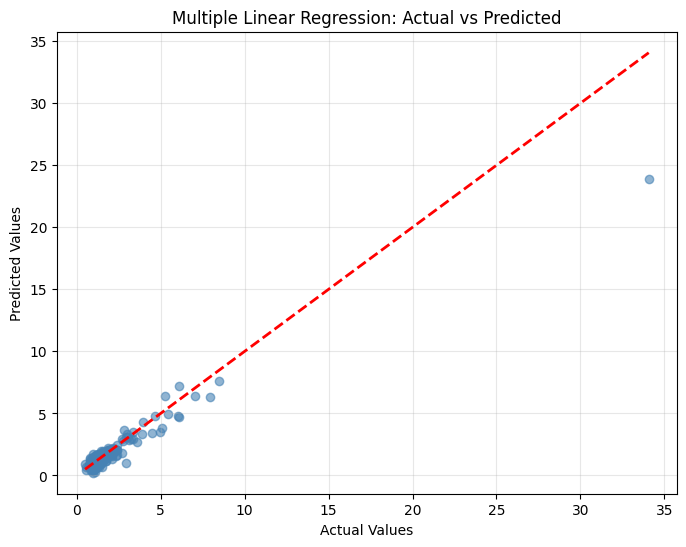

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_1, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

In [83]:
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)
print(f"MSE: {mse_1:.3f}")
print(f"R² Score: {r2_1:.3f}")

MSE: 0.050
R² Score: 0.867


In [84]:
# variance threshold filter
selector_2 = VarianceThreshold(threshold=0.1)
selector_2.fit(X_train)
X_train_filtered_2 = selector_2.transform(X_train)
X_test_filtered_2 = selector_2.transform(X_test)

model_2 = LinearRegression().fit(X_train_filtered_2, y_train)

y_pred_2 = model_2.predict(X_test_filtered_2)

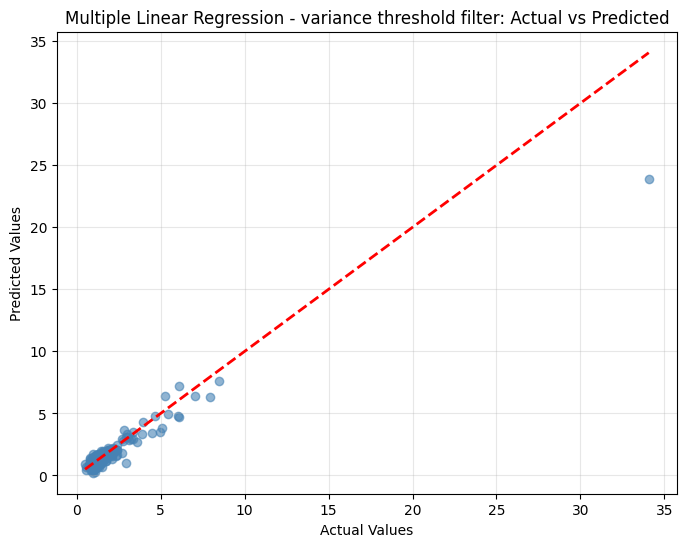

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_2, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression - variance threshold filter: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

In [86]:
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print(f"MSE: {mse_2:.3f}")
print(f"R² Score: {r2_2:.3f}")

MSE: 0.050
R² Score: 0.867


In [87]:
# correlation filter
correlations = housing.frame.corr()[target].abs().sort_values(ascending=False)
top_features = correlations.index[1:3]

X_train_filtered_3 = X_train[top_features]
X_test_filtered_3 = X_test[top_features]

model_3 = LinearRegression().fit(X_train_filtered_3, y_train)

y_pred_3 = model_3.predict(X_test_filtered_3)

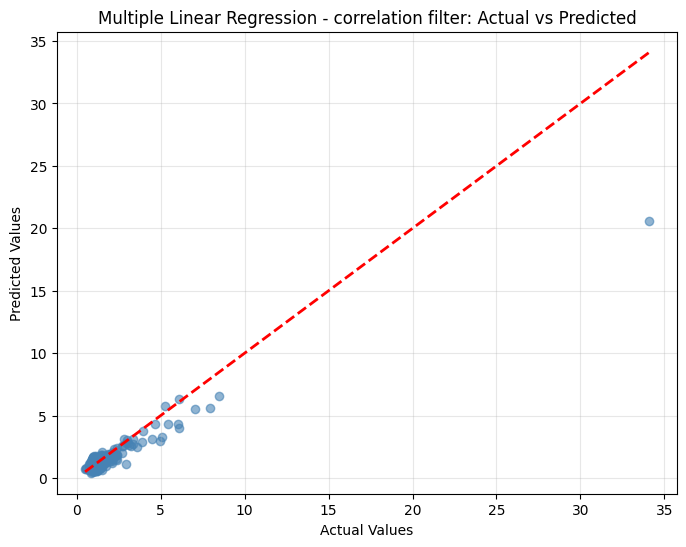

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_3, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression - correlation filter: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

In [89]:
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
print(f"MSE: {mse_3:.3f}")
print(f"R² Score: {r2_3:.3f}")

MSE: 0.092
R² Score: 0.752


In [90]:
# select k best f-classif
selector_4 = SelectKBest(f_classif, k=3)
selector_4.fit(X_train, y_train)

X_train_filtered_4 = selector_4.transform(X_train)
X_test_filtered_4 = selector_4.transform(X_test)

model_4 = LinearRegression().fit(X_train_filtered_4, y_train)

y_pred_4 = model_4.predict(X_test_filtered_4)

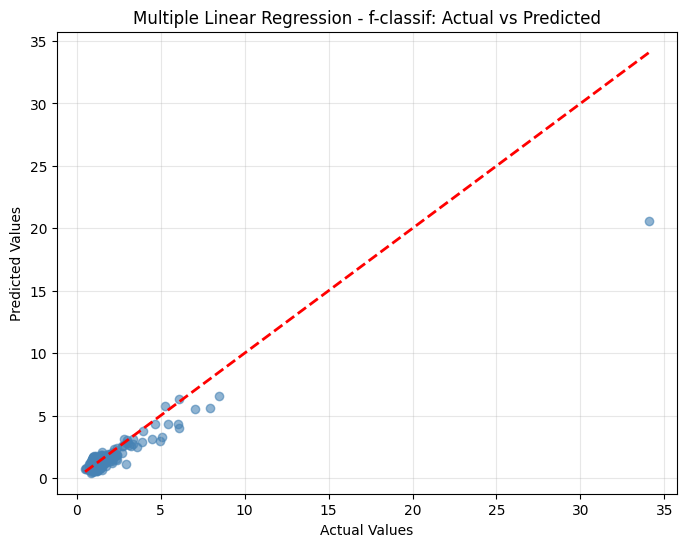

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_4, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression - f-classif: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

In [92]:
mse_4 = mean_squared_error(y_test, y_pred_4)
r2_4 = r2_score(y_test, y_pred_4)
print(f"MSE: {mse_4:.3f}")
print(f"R² Score: {r2_4:.3f}")

MSE: 0.092
R² Score: 0.752


In [93]:
# Recursive Feature Elimination
model_6 = LinearRegression()

selector_6 = RFE(model_6, n_features_to_select=4)
selector_6.fit(X_train, y_train)

X_train_filtered_6 = selector_6.transform(X_train)
X_test_filtered_6 = selector_6.transform(X_test)

model_6 = model_6.fit(X_train_filtered_6, y_train)

y_pred_6 = model_6.predict(X_test_filtered_6)

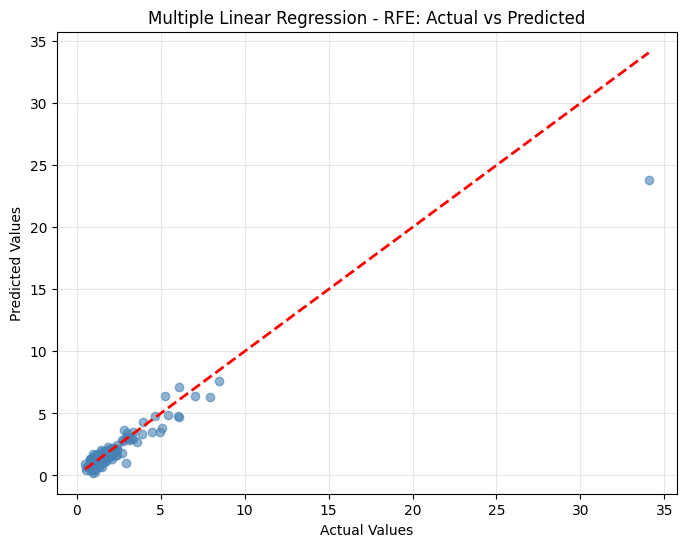

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_6, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression - RFE: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

In [95]:
mse_6 = mean_squared_error(y_test, y_pred_6)
r2_6 = r2_score(y_test, y_pred_6)
print(f"MSE: {mse_6:.3f}")
print(f"R² Score: {r2_6:.3f}")

MSE: 0.051
R² Score: 0.864


In [96]:
# L1 regularization
model_7 = Lasso(alpha=0.1)
model_7.fit(X_train, y_train)

y_pred_7 = model_7.predict(X_test)

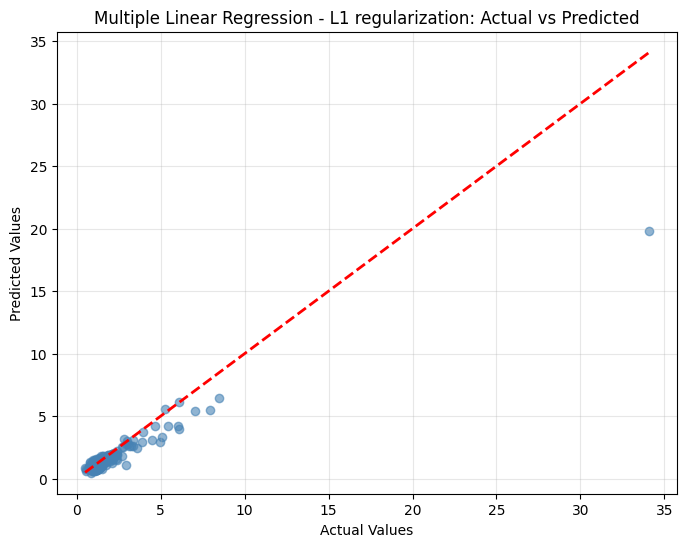

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_7, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression - L1 regularization: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

In [100]:
mse_7 = mean_squared_error(y_test, y_pred_7)
r2_7 = r2_score(y_test, y_pred_7)
print(f"MSE: {mse_7:.3f}")
print(f"R² Score: {r2_7:.3f}")

MSE: 0.078
R² Score: 0.791


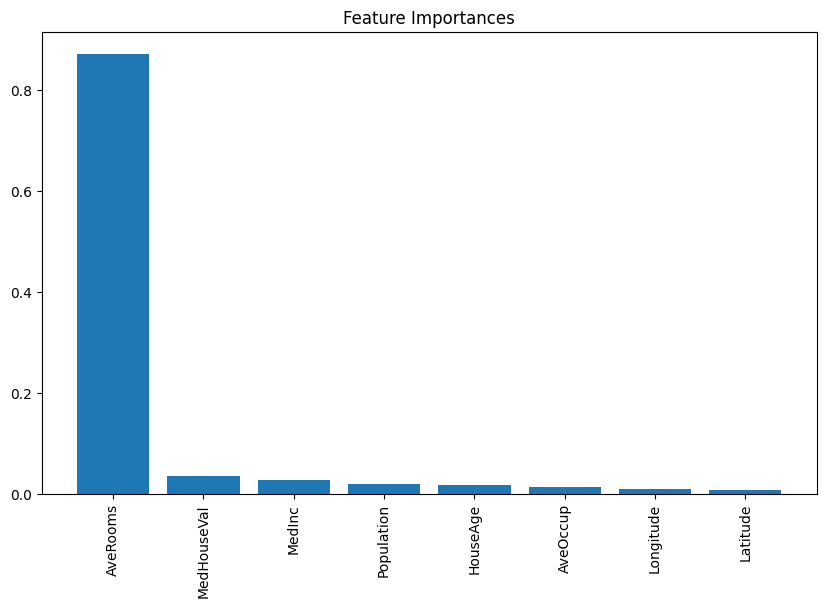

/home/ivan/Projects/machine-learning-lab-1-2/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/ivan/Projects/machine-learning-lab-1-2/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# tree based feature selection
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

selector_8 = SelectFromModel(rf, threshold='median')
X_train_filtered_8 = selector_8.transform(X_train)
X_test_filtered_8 = selector_8.transform(X_test)

model_8 = LinearRegression().fit(X_train_filtered_8, y_train)

y_pred_8 = model_8.predict(X_test_filtered_8)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_8, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression - Tree-based Feature Selection: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
mse_8 = mean_squared_error(y_test, y_pred_8)
r2_8 = r2_score(y_test, y_pred_8)
print(f"MSE: {mse_8:.3f}")
print(f"R² Score: {r2_8:.3f}")